**CM2_Project1**




**Austin Riggs**

**9/22/2023**

In [ ]:
import tensorflow as tf
from tensorflow import keras

**I am using the MNIST dataset for this assignment. Here I download the dataset and store it as a training and test set**

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

**I take 15% of the training set and create a validation set with it. I also divide both by 255.0 to get the the pixel values down between the range of 0 to 1.**

In [ ]:
X_valid, X_train = X_train_full[:9000] / 255.0, X_train_full[9000:] / 255.0
y_valid, y_train = y_train_full[:9000], y_train_full[9000:]
X_test = X_test / 255.0

In [ ]:
X_train.shape, X_valid.shape, X_test.shape

((51000, 28, 28), (9000, 28, 28), (10000, 28, 28))

**I create my first model with an input layer, 5 hidden layers, and an output layer. The first hidden layer starts with 300 neurons and goes down to 25 before hitting the output layer. I try the "relu" activation method here and initialize each kernal to "he_normal".**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(25, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 batch_normalization_2 (Bat  (None, 200)               8

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1594/1594 [==============================] - 23s 12ms/step - loss: 0.3516 - accuracy: 0.8977 - val_loss: 0.1673 - val_accuracy: 0.9510
Epoch 2/5
1594/1594 [==============================] - 18s 12ms/step - loss: 0.1650 - accuracy: 0.9502 - val_loss: 0.1312 - val_accuracy: 0.9623
Epoch 3/5
1594/1594 [==============================] - 20s 13ms/step - loss: 0.1259 - accuracy: 0.9614 - val_loss: 0.1091 - val_accuracy: 0.9703
Epoch 4/5
1594/1594 [==============================] - 19s 12ms/step - loss: 0.1041 - accuracy: 0.9680 - val_loss: 0.0934 - val_accuracy: 0.9734
Epoch 5/5
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0880 - accuracy: 0.9727 - val_loss: 0.0953 - val_accuracy: 0.9710


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0927 - accuracy: 0.9721


[0.09267117828130722, 0.972100019454956]

**97% is great! I will experiment with a few other configurations to see how they work. I will try again with a different number of neurons in each layer.**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_6 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_7 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 300)               90300     
                                                                 
 batch_normalization_8 (Bat  (None, 300)              

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1594/1594 [==============================] - 26s 14ms/step - loss: 0.3132 - accuracy: 0.9049 - val_loss: 0.1348 - val_accuracy: 0.9608
Epoch 2/5
1594/1594 [==============================] - 22s 14ms/step - loss: 0.1564 - accuracy: 0.9520 - val_loss: 0.1307 - val_accuracy: 0.9614
Epoch 3/5
1594/1594 [==============================] - 21s 13ms/step - loss: 0.1218 - accuracy: 0.9620 - val_loss: 0.1109 - val_accuracy: 0.9679
Epoch 4/5
1594/1594 [==============================] - 22s 14ms/step - loss: 0.1045 - accuracy: 0.9678 - val_loss: 0.1061 - val_accuracy: 0.9698
Epoch 5/5
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0866 - accuracy: 0.9730 - val_loss: 0.0991 - val_accuracy: 0.9749


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1040 - accuracy: 0.9717


[0.10396336764097214, 0.9717000126838684]

**97%, same as before. I am curious how this model would work with selu and "lecun_normal" so I will go ahead and try it.**



In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(600, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(200, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(50, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_12 (Ba  (None, 784)               3136      
 tchNormalization)                                               
                                                                 
 dense_12 (Dense)            (None, 600)               471000    
                                                                 
 batch_normalization_13 (Ba  (None, 600)               2400      
 tchNormalization)                                               
                                                                 
 dense_13 (Dense)            (None, 300)               180300    
                                                                 
 batch_normalization_14 (Ba  (None, 300)              

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1594/1594 [==============================] - 35s 20ms/step - loss: 0.2887 - accuracy: 0.9108 - val_loss: 0.1476 - val_accuracy: 0.9567
Epoch 2/5
1594/1594 [==============================] - 33s 21ms/step - loss: 0.1509 - accuracy: 0.9534 - val_loss: 0.1164 - val_accuracy: 0.9653
Epoch 3/5
1594/1594 [==============================] - 30s 19ms/step - loss: 0.1145 - accuracy: 0.9645 - val_loss: 0.1060 - val_accuracy: 0.9700
Epoch 4/5
1594/1594 [==============================] - 30s 19ms/step - loss: 0.0911 - accuracy: 0.9711 - val_loss: 0.1063 - val_accuracy: 0.9718
Epoch 5/5
1594/1594 [==============================] - 31s 19ms/step - loss: 0.0800 - accuracy: 0.9754 - val_loss: 0.0881 - val_accuracy: 0.9760


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0884 - accuracy: 0.9762


[0.08844096958637238, 0.9761999845504761]

**97% again! I want to try a model without the batchnormalization to see how that works out. This time I will try ReLU with LeakyReLU**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(600, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(200, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(50, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 600)               471000    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 600)               0         
                                                                 
 dense_19 (Dense)            (None, 300)               180300    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 300)               0         
                                                                 
 dense_20 (Dense)            (None, 200)               60200     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 200)              

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1594/1594 [==============================] - 25s 15ms/step - loss: 0.2397 - accuracy: 0.9271 - val_loss: 0.1307 - val_accuracy: 0.9624
Epoch 2/5
1594/1594 [==============================] - 25s 16ms/step - loss: 0.1318 - accuracy: 0.9603 - val_loss: 0.1373 - val_accuracy: 0.9624
Epoch 3/5
1594/1594 [==============================] - 22s 14ms/step - loss: 0.1037 - accuracy: 0.9685 - val_loss: 0.1135 - val_accuracy: 0.9677
Epoch 4/5
1594/1594 [==============================] - 24s 15ms/step - loss: 0.0885 - accuracy: 0.9728 - val_loss: 0.1153 - val_accuracy: 0.9710
Epoch 5/5
1594/1594 [==============================] - 23s 15ms/step - loss: 0.0747 - accuracy: 0.9774 - val_loss: 0.1288 - val_accuracy: 0.9668


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1213 - accuracy: 0.9684


[0.12128470093011856, 0.9684000015258789]

**Again, 97%. Not bad at all. Next I will test my model manually.**
```



In [ ]:
X_new = X_test[:1]

In [ ]:
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 133ms/step


In [ ]:
y_pred.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

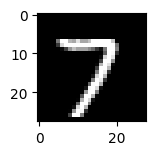

In [ ]:
from matplotlib import pyplot

pyplot.subplot(330 + 1 + 1)
pyplot.imshow(X_train[1], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
X_new = X_test[10:11]

In [ ]:
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 25ms/step


In [ ]:
y_pred.round(2)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

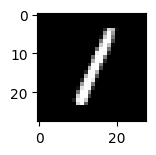

In [ ]:
pyplot.subplot(330 + 1 + 1)
pyplot.imshow(X_train[11], cmap=pyplot.get_cmap('gray'))
pyplot.show()

**Looks like it works well.**

In conclusion, while I did create four separate models in this assignment, all of them performed very similarly. While most of the models were fairly similar, I was expecting to have some sort of shift in accuracy from removing the batch normalization and using leakyReLU instead. I am curious to continue to play around with this moving forward and trying to get a better understanding of how to best tune these hyperparameters.